In [291]:
import pandas as pd

In [292]:
#list_available_datasets()
#there are no headers in adult.data so add them first
headers = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]
file = pd.read_csv("adult.data")
file.to_csv("new_adult.data",header=headers,index=False)
df = pd.read_csv("new_adult.data")
new_df = df.head(20).append(df.tail(20))
print(df.info())
print(df.describe())
print(df.isnull().sum())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  3

/var/folders/p4/fw9lt2h52bbbcpcmkgxwwwlw0000gq/T/ipykernel_79940/1975234558.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df.head(20).append(df.tail(20))


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
#Correlated variables
# Here below columns are catagorical which are trnasformed to numberic using OnHot encoding technique
impport Label


workclass_encoded = pd.get_dummies(df["workclass"])
marital-status = pd.get_dummies(df["marital-status"])

workclass_encoded
#import seaborn as sns
#sns.pairplot(df)

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,1,0,0,0,0
32556,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,1,0,0,0,0


In [81]:
#Print Pair plot to find relation
# convert catagorical (non numeric features into Number)
# create a DataFrame copy before converting 
from sklearn.preprocessing import LabelEncoder
df_number_copy = df.copy();
grp_by_df = df_number_copy.groupby(["education","education-num"]).first()
print(grp_by_df)
df_number_copy["education"].unique()
#grouping ["education","education-num"] shows there exits unique "education-num" value for each "education" catagory
#With that "education" feature can be ignored as "education-num" column provide same inforamtion

df = df[df.columns.drop("education")]
df

                             age          workclass  fnlwgt  \
education     education-num                                   
 10th         6               67                  ?  212759   
 11th         7               53            Private  234721   
 12th         8               35            Private   92440   
 1st-4th      2               68                  ?   38317   
 5th-6th      3               46            Private  216666   
 7th-8th      4               34            Private  245487   
 9th          5               49            Private  160187   
 Assoc-acdm   12              32            Private  205019   
 Assoc-voc    11              40            Private  121772   
 Bachelors    13              50   Self-emp-not-inc   83311   
 Doctorate    16              40            Private  193524   
 HS-grad      9               38            Private  215646   
 Masters      14              37            Private  284582   
 Preschool    1               53          Local-gov  14

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


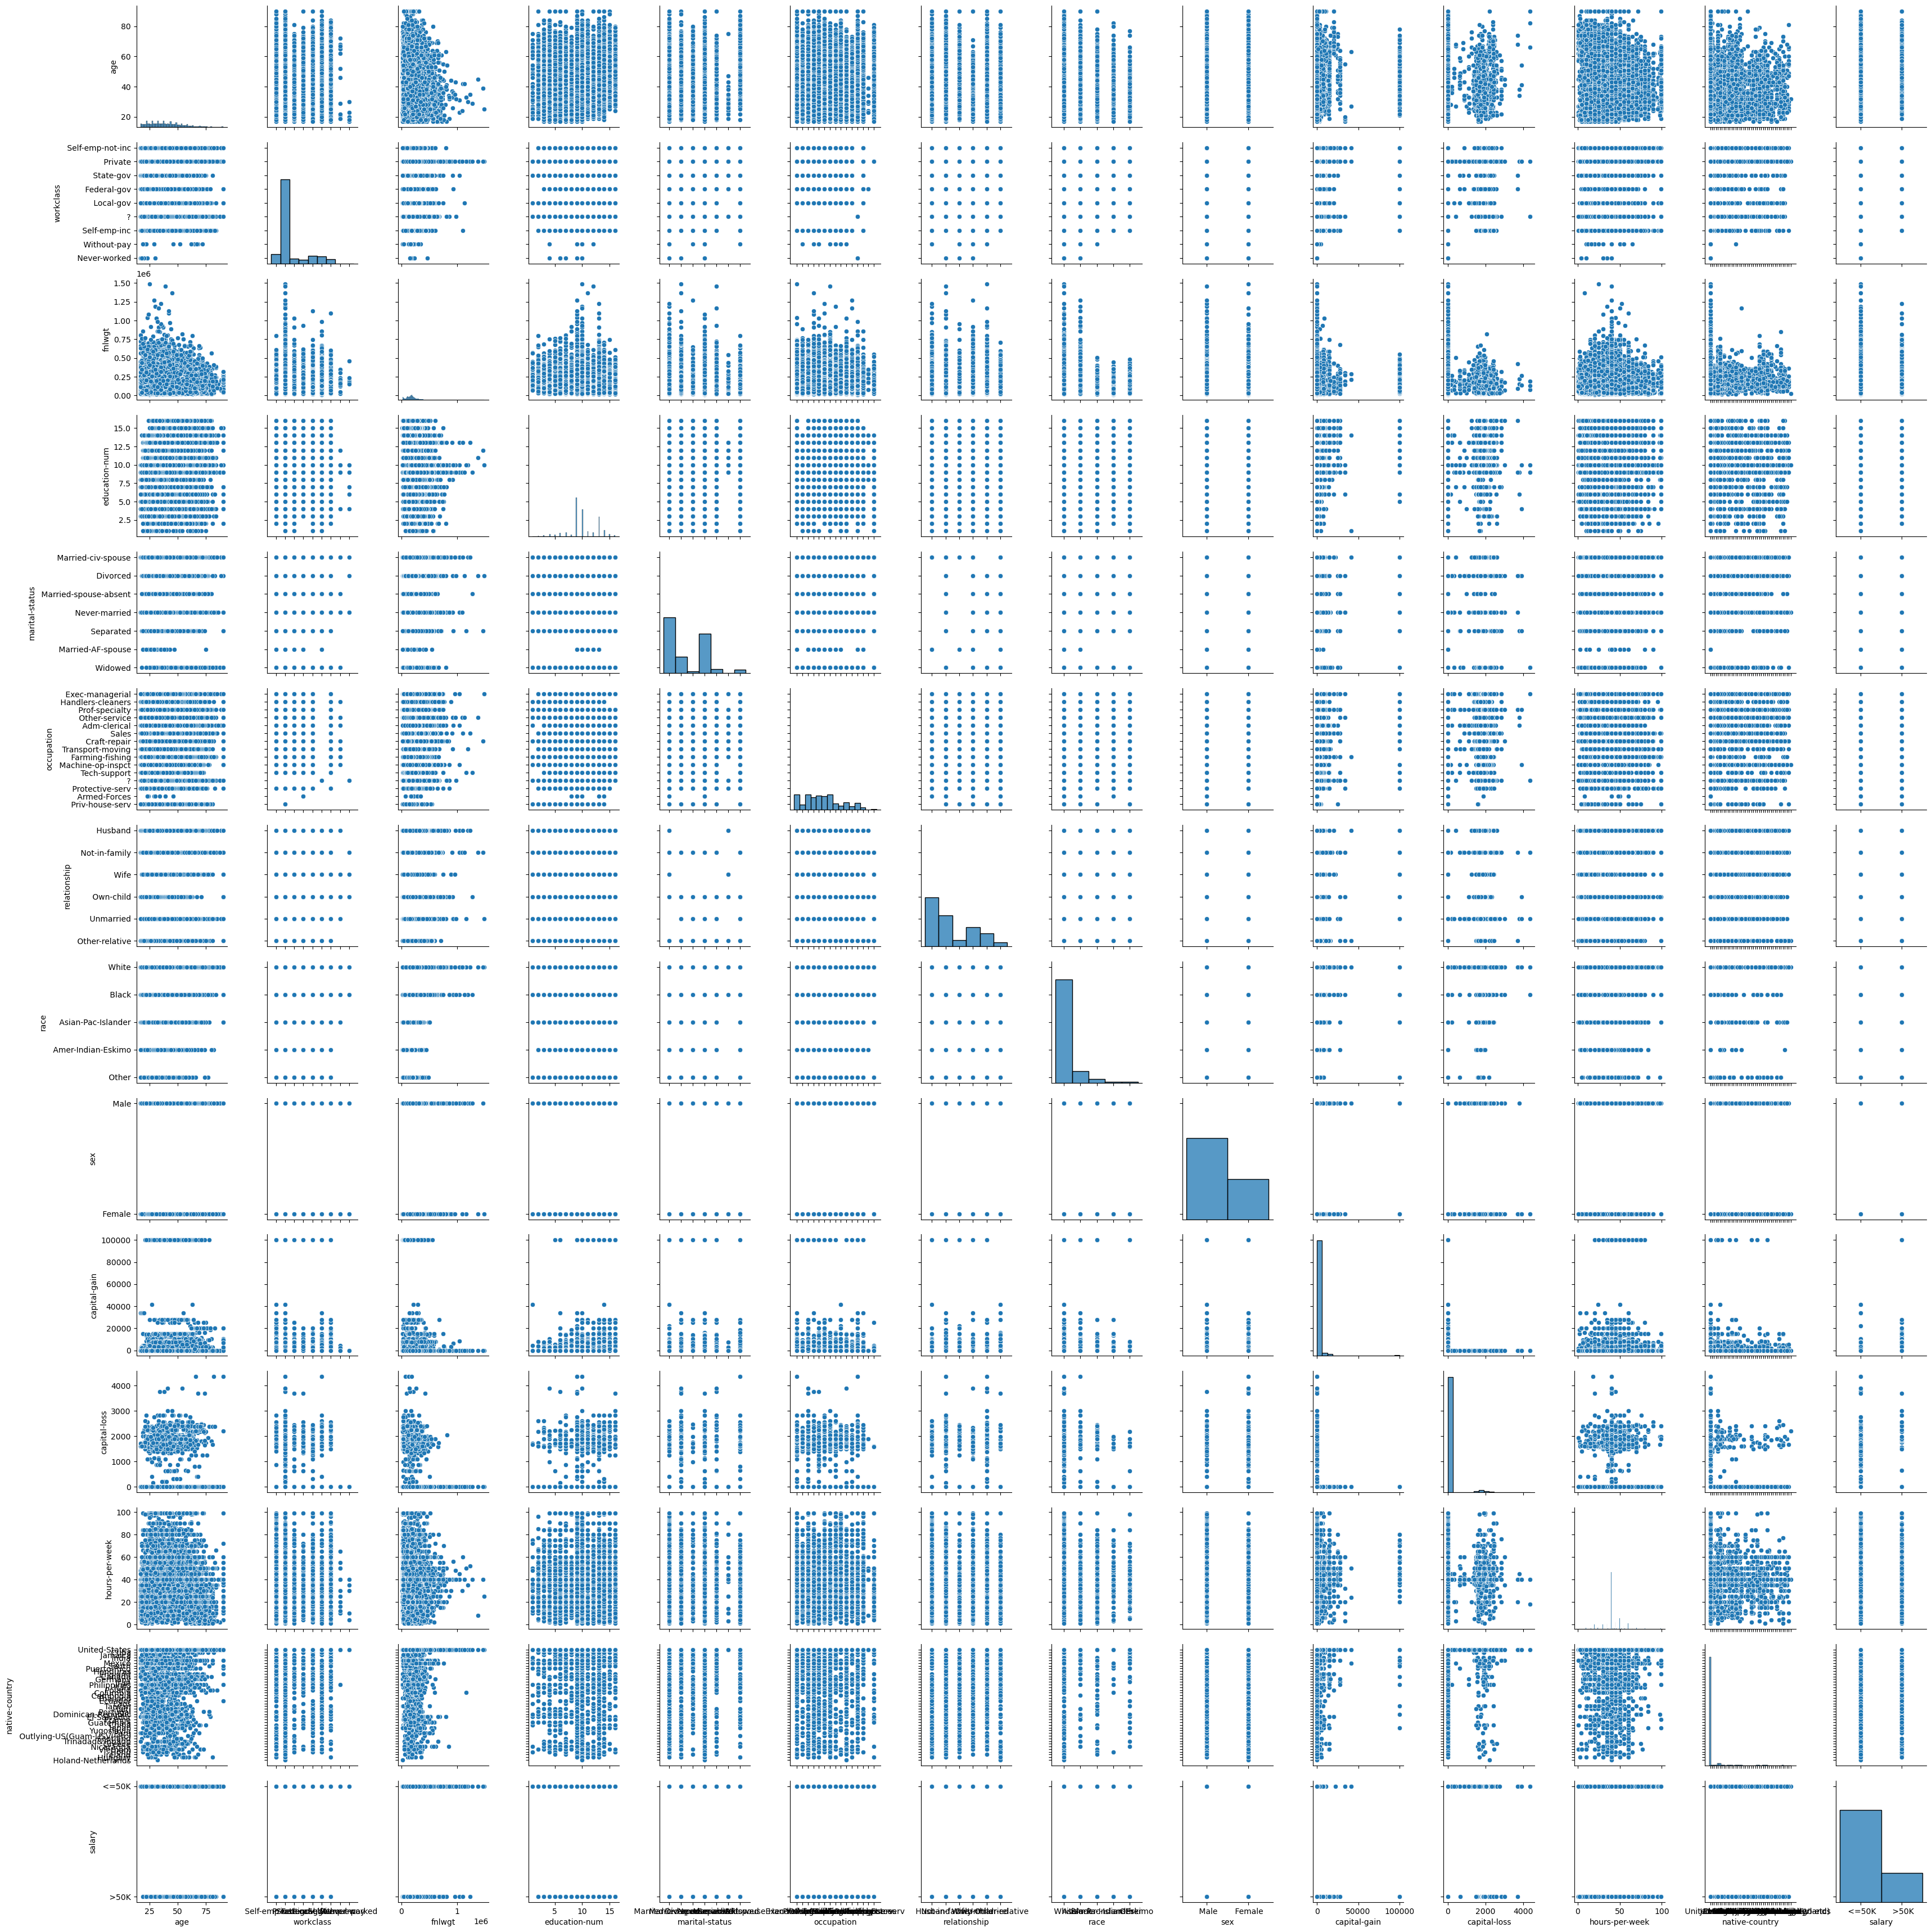

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown


#skipping "education" feature because of the reason mentioned above
sns.pairplot(df,vars=["age","workclass","fnlwgt","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"])
#sns.pairplot(df,vars=["relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"])
#print(df["education-num"].unique())
#print(df["education"].unique())
#df["education-num","education"]





In [95]:
    df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000
